**Credit Card Fraud Detection**

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

**Notes-**
1.   The entire code has been developed using google colab.
2.  Owing to memory issues, gccollect() function has been used,in between the code,to remove  unnecessary cached data.
3. Entire Code Takes around 7-8 Hours to complete.



In [2]:
import timeit
start_time = timeit.default_timer()
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve
from imblearn.over_sampling import RandomOverSampler
from imblearn import over_sampling
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier, plot_importance
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats
from scipy.stats import skew
from scipy.stats import kurtosis
import math

In [3]:
## EDA Operations
cc_df = pd.read_csv('/content/drive/My Drive/creditcard.csv')
cc_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
cc_df.info()
# All values are not null.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
cc_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
## Analyzing Class Distribution
cc_class=cc_df['Class'].value_counts()
class0=cc_class[0]/cc_df['Class'].count()*100
class1=cc_class[1]/cc_df['Class'].count()*100

In [7]:
print(cc_class)
print(class0)
print(class1)
# There exists heavily imbalenced data

0    284315
1       492
Name: Class, dtype: int64
99.82725143693798
0.1727485630620034


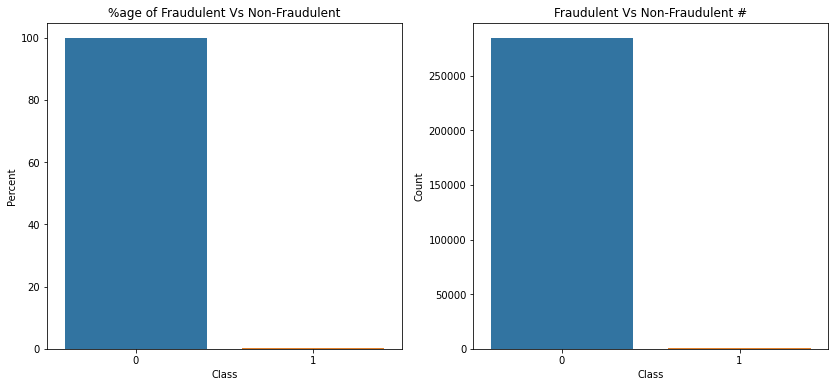

In [8]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
plt.figure(figsize=(14,6))
plt.subplot(121)
ax = sns.barplot(x="Class", y="Class", data=cc_df, estimator=lambda x: len(x) / len(cc_df) * 100)
ax.set(ylabel="Percent")
plt.title('%age of Fraudulent Vs Non-Fraudulent')

plt.subplot(122)
ax = sns.barplot(x="Class", y="Class", data=cc_df, estimator=lambda x: len(x))
ax.set(ylabel="Count")
plt.title('Fraudulent Vs Non-Fraudulent #')
plt.show()

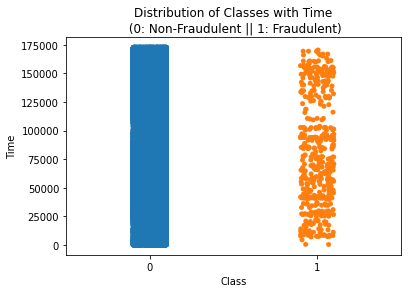

In [9]:
# Create a scatter plot to observe the distribution of classes with time
sns.stripplot(x= 'Class', y= 'Time',data=cc_df)
plt.title('Distribution of Classes with Time\n (0: Non-Fraudulent || 1: Fraudulent)')
plt.show()


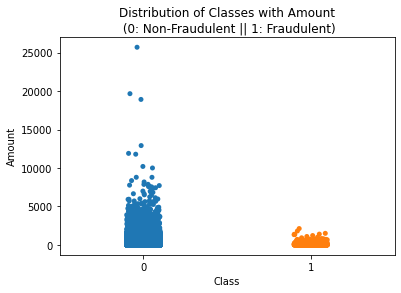

In [10]:
# Create a scatter plot to observe the distribution of classes with Amount
sns.stripplot(x= 'Class', y= 'Amount',data=cc_df)
plt.title('Distribution of Classes with Amount\n (0: Non-Fraudulent || 1: Fraudulent)')
plt.show()

In [11]:
# Drop Time Column,Since it is not required
cc_df.drop('Time', axis=1, inplace=True)

**Splitting the data into train & test data**

In [12]:
# Peforming Test/Train Split
X = cc_df.drop('Class', axis=1)
y= cc_df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.7, test_size=0.3, random_state=100)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(199364, 29) (199364,) (85443, 29) (85443,)


**Preserve X_test & y_test to evaluate on the test data once you build the model**

In [13]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
350
142


In [14]:
# Scaling Amount Column
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train['Amount'] = scaler.fit_transform(np.array(X_train['Amount']).reshape(-1,1))
X_test['Amount'] = scaler.transform(np.array(X_test['Amount']).reshape(-1,1))

**Plotting the distribution of a variable**

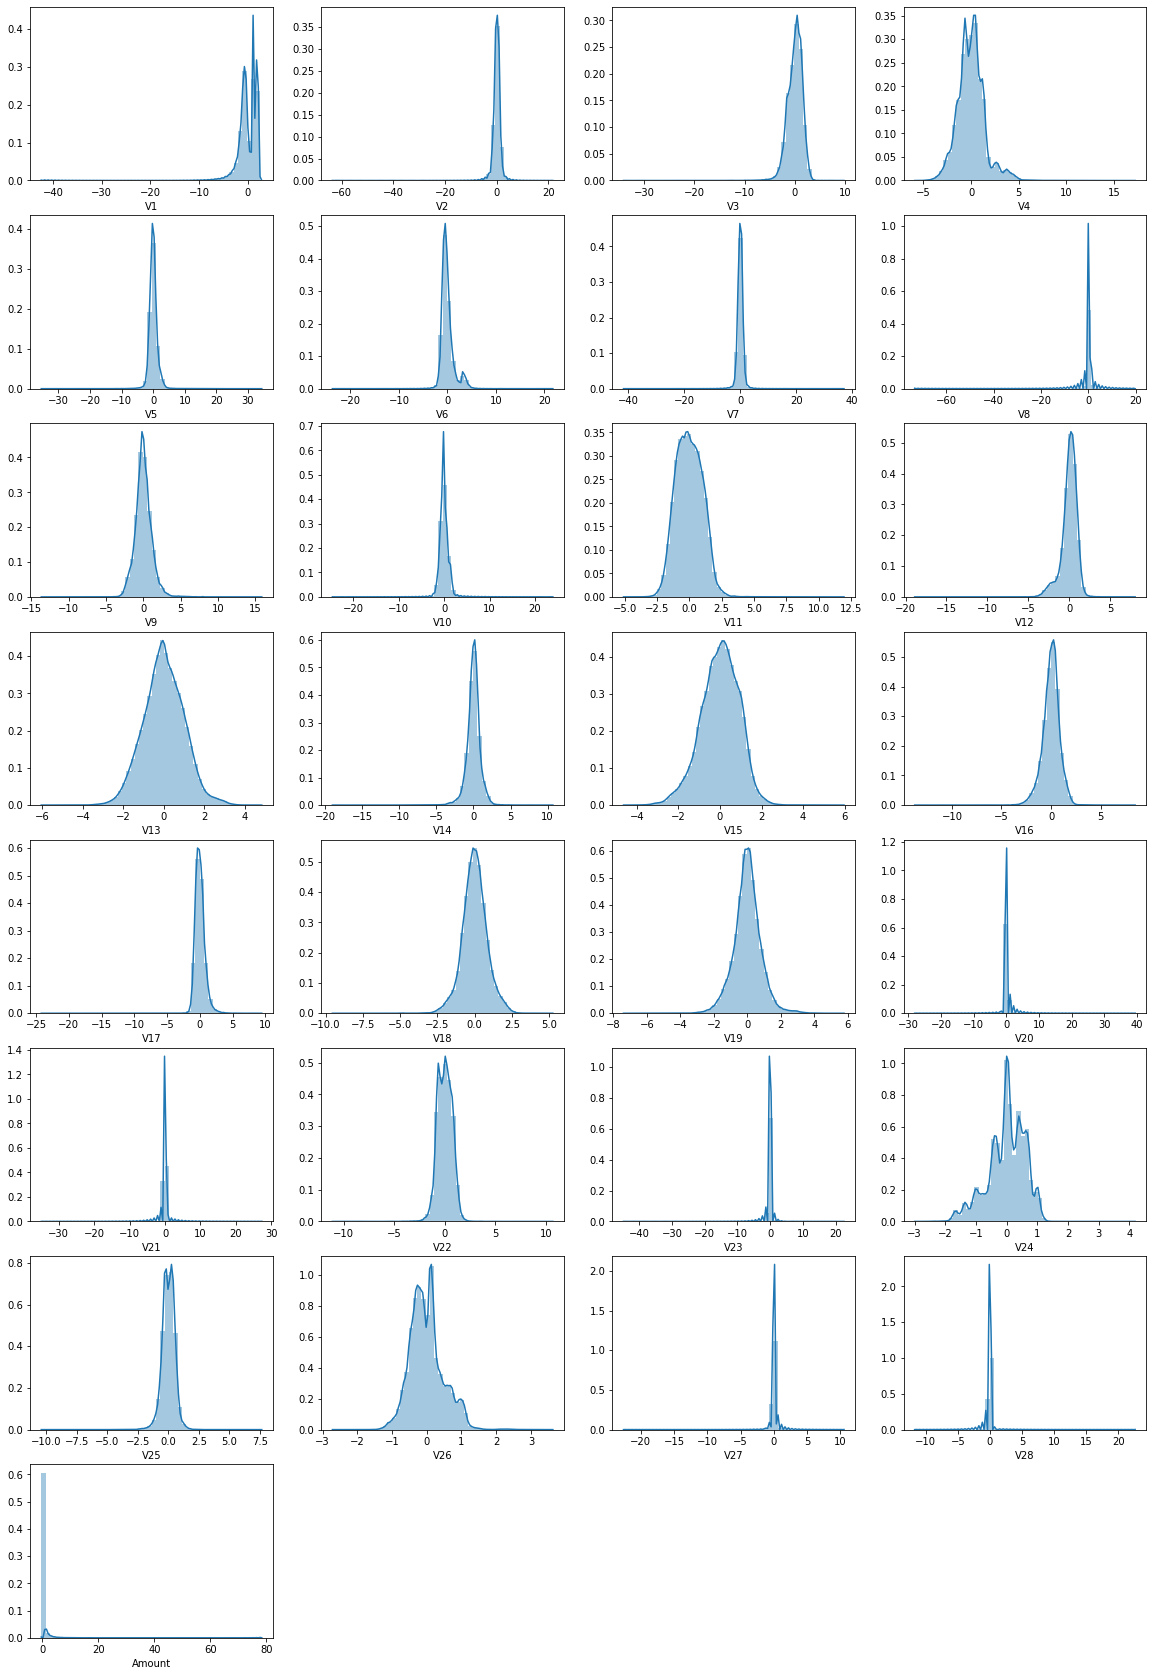

In [15]:
#Skewness Analysis
# plot the histogram of a variable from the dataset to see the skewness
plt.figure(figsize=(20,30))
m = 1
for i in X_train.columns:
    plt.subplot(8,4,m)
    sns.distplot(X_train[i])
    m +=1
plt.show()

In [16]:
# From Above it can be seen that most of the values are Skewed. To Handle this we will apply the Power Transformer, with 'yeo-johnson' method, on train & test data

In [17]:
# Applying Power Transformer on Train & Test Data
cols = X_train.columns
cols1=X_test.columns  
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson', standardize=True, copy=False)
X_train[cols] = pt.fit_transform(X_train[cols])
X_test[cols1] = pt.fit_transform(X_test[cols1])

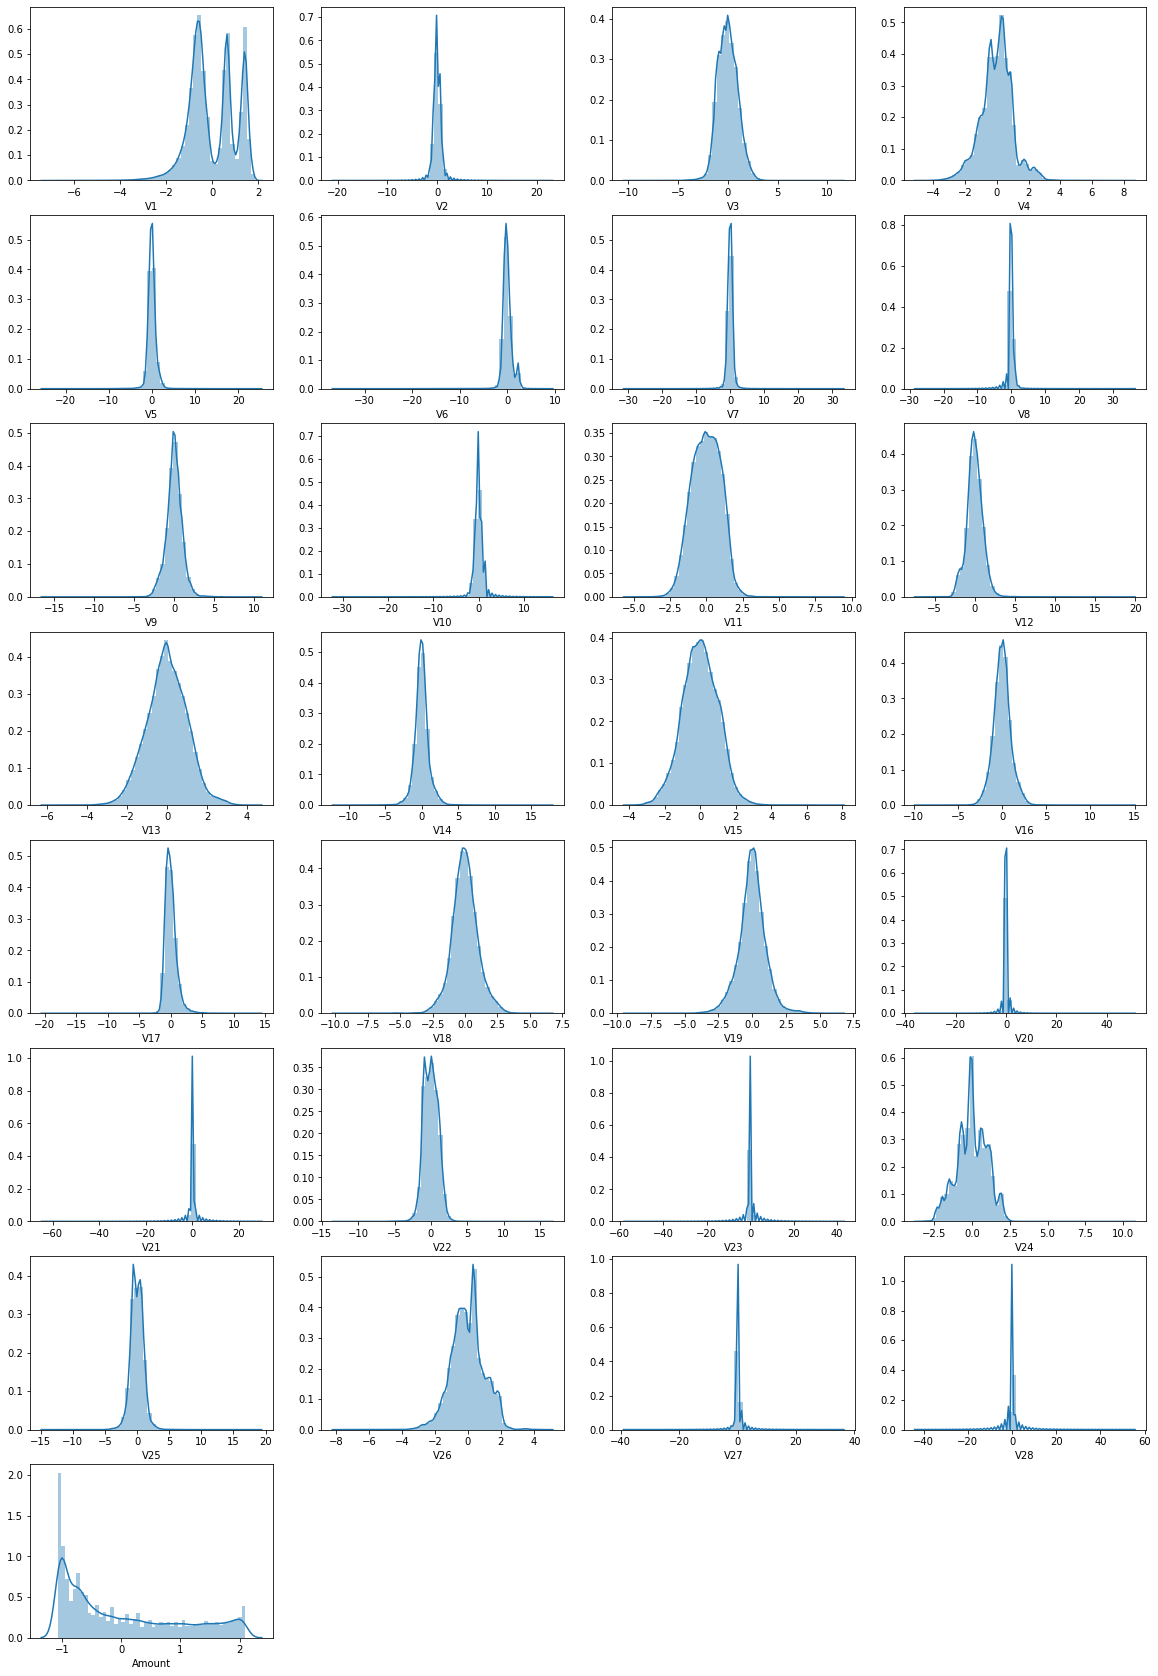

In [18]:
# plot the histogram of a variable from the dataset again to see the result 
plt.figure(figsize=(20,30))
m = 1
for i in X_train.columns:
    plt.subplot(8,4,m)
    sns.distplot(X_train[i])
    m +=1
plt.show()

**Model Building**


In [19]:
# We will be Requiring Data Imbalance Handling Technique for Parameter Tuning Rechniques multiple times throughout the code. 
#Hence calculating it here itself. & using the same in later part of the code.

In [20]:
#1) Random Oversampling Technique
ros = RandomOverSampler(sampling_strategy='minority')
X_train_ros, y_train_ros = ros.fit_sample(X_train, y_train)
X_train_ros = pd.DataFrame(data=X_train_ros, columns=X_train.columns)
X_train_ros.shape

(398028, 29)

In [21]:
#2) SMOTE Technique
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)
X_train_smote, y_train_smote = sm.fit_sample(X_train, y_train.ravel())
X_train_smote = pd.DataFrame(data=X_train_smote, columns=X_train.columns)
X_train_smote.shape

(398028, 29)

In [22]:
#3) Adasyn Technique
from imblearn.over_sampling import ADASYN 
ada = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
X_train_adasyn.shape

(398031, 29)

In [23]:
#4)Print the class distribution after applying ADASYN
from imblearn import over_sampling
def adasyn_classdistribution(X_train, y_train):
  ada = over_sampling.ADASYN(random_state=0)
  X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
  # Artificial minority samples and corresponding minority labels from ADASYN are appended
  # below X_train and y_train respectively
  # So to exclusively get the artificial minority samples from ADASYN, we do
  X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

  X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
  X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



  import matplotlib.pyplot as plt
  %matplotlib inline
  plt.rcParams['figure.figsize'] = [20, 20]
  fig = plt.figure()

  plt.subplot(3, 1, 1)
  plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
  plt.legend()

  plt.subplot(3, 1, 2)
  plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
  plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
              label='Artificial ADASYN Class-1 Examples')
  plt.legend()

  plt.subplot(3, 1, 3)
  plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
  plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
  plt.legend()

In [24]:
#5) Print the class distribution after applying SMOTE
def smote_classdistribution(X_train, y_train):
  sm = over_sampling.SMOTE(random_state=0)
  X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
  # Artificial minority samples and corresponding minority labels from SMOTE are appended
  # below X_train and y_train respectively
  # So to exclusively get the artificial minority samples from SMOTE, we do
  X_train_smote_1 = X_train_smote[X_train.shape[0]:]

  X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
  X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


  plt.rcParams['figure.figsize'] = [20, 20]
  fig = plt.figure()

  plt.subplot(3, 1, 1)
  plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
  plt.legend()

  plt.subplot(3, 1, 2)
  plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
  plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
              label='Artificial SMOTE Class-1 Examples')
  plt.legend()

  plt.subplot(3, 1, 3)
  plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
  plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
  plt.legend()

In [25]:
# We will be requiring to plot the AUC_ROC Curve multiple times throughout the model building.
# Hence we will create a function auc_roc & this function will be called multiple times throughout the Model Building Process, with required Paramaters.
# We will also Define Functions for Evaluation Metrics for Train & Test Dataset
#Instantiting Model Report Data Frame
Model_Report=pd.DataFrame({'Model':[' '],'Balancing_Technique':[' '] ,'Accuracy': [' '],'Recall':[' '],'F1_Score':[' '],'Test_AUC':[' ']})

In [26]:
# Finding Training Data Metrics
def metrics_train(model, X_train, y_train):
    y_pred = model.predict_proba(X_train)[:,1] 
    roc = metrics.roc_auc_score(y_train, y_pred)
    fpr, tpr, thresholds = metrics.roc_curve(y_train, y_pred)
    threshold = thresholds[np.argmax(tpr-fpr)]
    y_pred_final = y_pred > threshold
    y_pred_final = y_pred_final.astype(int)
    return threshold

In [27]:
# Finding Test Data Metrics
def metrics_test(model, train_threshold):
    y_pred = model.predict_proba(X_test)[:,1]
    y_pred = y_pred > train_threshold
    y_pred = y_pred.astype(int)
    roc = metrics.roc_auc_score(y_test, y_pred)
    print("Test AUC: %.2f%%" % (roc * 100.0))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
    print("Test Accuracy: ",metrics.accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    cm=confusion_matrix(y_test, y_pred)
    print("Test Confusion Matrix:\n",cm)
    return metrics.accuracy_score(y_test, y_pred)

In [28]:
#While Building Decision Trees, we will be requiring to call the Hyperparamter Functions multiple times. Hence Defining the functions for the same now & Calling them later in the code.

In [29]:
#4) Automated Grid Search
def dt_automated_gridsearch(X_train,y_train):
	param_grid = {
		'max_depth': range(2, 12, 2),
		'min_samples_leaf': range(30, 150, 30),
		'min_samples_split': range(50, 200, 50),
		'criterion': ["entropy", "gini"]
	}

	n_folds = 3

	# Instantiate the grid search model
	dtree = DecisionTreeClassifier()
	grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
							  cv = n_folds, verbose = 1,n_jobs=3)

	# Fit the grid search to the data
	grid_search.fit(X_train,y_train)
	# cv results
	cv_results = pd.DataFrame(grid_search.cv_results_)
	# printing the optimal accuracy score and hyperparameters
	print("Best Accuracy", grid_search.best_score_)
	print(grid_search.best_estimator_)	
	return None

In [30]:
#While Building Random Forests, we will be requiring to call the Hyperparamter Functions multiple times. Hence Defining the functions for the same now & Calling them later in the code.

In [31]:
#6) RFC Automated Grid Search
def rfc_automatedgridsearch(X_train,y_train):
  param_grid = {
      'max_depth': [4,7],
      'min_samples_leaf': [150],
      'min_samples_split':[250],
      'n_estimators': [100,200], 
      'max_features': [4, 8]
  }
  # Create a based model
  rf = RandomForestClassifier()
  # Instantiate the grid search model
  grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,cv = 3, n_jobs = 3,verbose = 1)

  # Fit the grid search to the data
  grid_search.fit(X_train, y_train)
  # Optimal Hyperparameters
  print('Optimal Hyperparameters- ',grid_search.best_params_)
  return None

In [ ]:
#Model Building

#1) Logistic Regresion.


In [51]:
logreg=LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
# Test Set Evaluation
train_threshold = metrics_train(logreg, X_train, y_train)
metrics_test(logreg, train_threshold)

Test AUC: 91.69%
Test Accuracy:  0.9884484393104175
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     85301
           1       0.11      0.85      0.20       142

    accuracy                           0.99     85443
   macro avg       0.56      0.92      0.59     85443
weighted avg       1.00      0.99      0.99     85443

Test Confusion Matrix:
 [[84336   965]
 [   22   120]]


0.9884484393104175

In [53]:
#Adding Logistic Regression Value to Model Report DF
temp=pd.DataFrame({'Model':['Logistic Regression'],'Balancing_Technique':['Default'] ,'Accuracy': ['96.54%'],'Recall':['87%'],'F1_Score':['0.08'],'Test_AUC':['91.94%']})
Model_Report=pd.concat([Model_Report,temp])

In [54]:
# K fold Validation
param_grid = {'C': [0.01, 0.1, 1, 10, 100],
             'penalty': ['l1', 'l2']}
logreg_hp = LogisticRegression(random_state=42)
grid_search = GridSearchCV(estimator = logreg_hp, 
                           param_grid = param_grid,
                           cv=StratifiedKFold(3).split(X_train, y_train), 
                           scoring="roc_auc",
                           return_train_score=True, 
                           n_jobs = 4,
                           verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   13.3s finished


GridSearchCV(cv=<generator object _BaseKFold.split at 0x7f57268e9678>,
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=42, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=4,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=1)

In [55]:
print('Optimal Hyperparameters- ',grid_search.best_params_)

Optimal Hyperparameters-  {'C': 0.01, 'penalty': 'l2'}


In [56]:
# model with the optimal hyperparameters
logreg = LogisticRegression(C=0.01, penalty='l2', random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
# Test Set Evaluation
train_threshold = metrics_train(logreg, X_train, y_train)
metrics_test(logreg, train_threshold)

Test AUC: 92.47%
Test Accuracy:  0.97590206336388
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85301
           1       0.06      0.87      0.11       142

    accuracy                           0.98     85443
   macro avg       0.53      0.92      0.55     85443
weighted avg       1.00      0.98      0.99     85443

Test Confusion Matrix:
 [[83260  2041]
 [   18   124]]


0.97590206336388

In [ ]:
#Logistic Regression with Data Imbalance Management

In [58]:
# 1) Randomoversampling
param_grid = {'C': [0.01, 0.1, 1, 10, 100],
             'penalty': ['l1', 'l2']}
# Create a based model
logreg_ros = LogisticRegression(random_state=42)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = logreg_ros, 
                           param_grid = param_grid,
                           cv=StratifiedKFold(3).split(X_train_ros, y_train_ros), 
                           scoring="roc_auc",
                           return_train_score=True, 
                           n_jobs = 4,
                           verbose = 1)
grid_search.fit(X_train_ros, y_train_ros)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  23 out of  30 | elapsed:   14.7s remaining:    4.5s
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   18.6s finished


GridSearchCV(cv=<generator object _BaseKFold.split at 0x7f57268e9fc0>,
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=42, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=4,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=1)

In [59]:
# Determining Optimal Hyperparameters
print('Optimal HyperParameters- ',grid_search.best_params_)

Optimal HyperParameters-  {'C': 10, 'penalty': 'l2'}


In [60]:
# model with the best hyperparameters
logreg_ros = LogisticRegression(C=10, penalty='l2', solver='liblinear',random_state=42)
logreg_ros.fit(X_train_ros, y_train_ros)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [61]:
# Test Set Evaluation
train_threshold = metrics_train(logreg_ros, X_train_ros, y_train_ros)
metrics_test(logreg_ros, train_threshold)

Test AUC: 92.87%
Test Accuracy:  0.9840595484709105
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85301
           1       0.08      0.87      0.15       142

    accuracy                           0.98     85443
   macro avg       0.54      0.93      0.57     85443
weighted avg       1.00      0.98      0.99     85443

Test Confusion Matrix:
 [[83957  1344]
 [   18   124]]


0.9840595484709105

In [62]:
#Adding Logistic Regression Value to Model Report DF
temp=pd.DataFrame({'Model':['Logistic Regression'],'Balancing_Technique':['Random Oversampling'] ,'Accuracy': ['98.40%'],'Recall':['87%'],'F1_Score':['0.15'],'Test_AUC':['92.87%']})
Model_Report=pd.concat([Model_Report,temp])

In [ ]:
#2) SMOTE

In [63]:
# Create the parameter grid based
param_grid = {'C': [0.01, 0.1, 1, 10, 100],
             'penalty': ['l1', 'l2']}
# Create a based model
logreg_smote = LogisticRegression(random_state=42)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = logreg_smote, 
                           param_grid = param_grid,
                           cv=StratifiedKFold(3).split(X_train_smote, y_train_smote), 
                          scoring="roc_auc",
                           return_train_score=True, 
                          n_jobs = 4,
                           verbose = 1)
grid_search.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  23 out of  30 | elapsed:   13.8s remaining:    4.2s
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   18.5s finished


GridSearchCV(cv=<generator object _BaseKFold.split at 0x7f57268e9e60>,
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=42, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=4,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=1)

In [64]:
# Optimal Score & Hyper Paramater with Smote
print('Optimal HyperParameters- ',grid_search.best_params_)

Optimal HyperParameters-  {'C': 0.1, 'penalty': 'l2'}


In [65]:
# Model with Optimal Hyperparameters
logreg_smote = LogisticRegression(C=0.1, penalty='l2',solver='liblinear', random_state=42)
logreg_smote.fit(X_train_smote, y_train_smote)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [66]:
# Test Set Evaluation
train_threshold = metrics_train(logreg_smote, X_train_smote, y_train_smote)
metrics_test(logreg_smote, train_threshold)

Test AUC: 93.50%
Test Accuracy:  0.9755626558056248
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85301
           1       0.06      0.89      0.11       142

    accuracy                           0.98     85443
   macro avg       0.53      0.94      0.55     85443
weighted avg       1.00      0.98      0.99     85443

Test Confusion Matrix:
 [[83228  2073]
 [   15   127]]


0.9755626558056248

In [67]:
#Adding Logistic Regression Value to Model Report DF
temp=pd.DataFrame({'Model':['Logistic Regression'],'Balancing_Technique':['SMOTE'] ,'Accuracy': ['97.55%'],'Recall':['89%'],'F1_Score':['0.11'],'Test_AUC':['93.50%']})
Model_Report=pd.concat([Model_Report,temp])

In [ ]:
#3) Adasyn

In [68]:
# Create the parameter grid based
param_grid = {'C': [0.01, 0.1, 1, 10, 100],
             'penalty': ['l1', 'l2']}
logreg_ada = LogisticRegression(random_state=42)
grid_search = GridSearchCV(estimator = logreg_ada, 
                          param_grid = param_grid,
                          cv=StratifiedKFold(3).split(X_train_adasyn, y_train_adasyn), 
                          return_train_score=True, 
                           n_jobs = 4,
                           verbose = 1)
grid_search.fit(X_train_adasyn, y_train_adasyn)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  23 out of  30 | elapsed:   15.4s remaining:    4.7s
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   20.0s finished


GridSearchCV(cv=<generator object _BaseKFold.split at 0x7f57268e9bf8>,
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=42, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=4,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=1)

In [69]:
# Optimal Score & Parameters Value
print('Optimal HyperParameters- ',grid_search.best_params_)

Optimal HyperParameters-  {'C': 10, 'penalty': 'l2'}


In [70]:
# model with the optimal hyperparameters
logreg_adasyn = LogisticRegression(C=10, penalty='l2',solver='liblinear', random_state=42)
logreg_adasyn.fit(X_train_adasyn, y_train_adasyn)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [71]:
# Test Set Evaluation
train_threshold = metrics_train(logreg_adasyn, X_train_adasyn, y_train_adasyn)
metrics_test(logreg_adasyn, train_threshold)

Test AUC: 90.08%
Test Accuracy:  0.8510703041793944
              precision    recall  f1-score   support

           0       1.00      0.85      0.92     85301
           1       0.01      0.95      0.02       142

    accuracy                           0.85     85443
   macro avg       0.51      0.90      0.47     85443
weighted avg       1.00      0.85      0.92     85443

Test Confusion Matrix:
 [[72583 12718]
 [    7   135]]


0.8510703041793944

In [72]:
#Adding Logistic Regression Value to Model Report DF
temp=pd.DataFrame({'Model':['Logistic Regression'],'Balancing_Technique':['ADASYN'] ,'Accuracy': ['85.10%'],'Recall':['95%'],'F1_Score':['0.02'],'Test_AUC':['90.08%']})
Model_Report=pd.concat([Model_Report,temp])

In [ ]:
import gc
gc.collect()

**Similarly explore other algorithms by building models like:**
1.   KNN -- Could not build since it was both time & resource Consuming 
2.   SVM -- Could not build since it was both time & resource Consuming
3.   Decision Tree
4.   Random Forest
5.   XGBoost    

#2)XG Boosting

In [81]:
# fit model with default hyperparameters
xgboost = XGBClassifier()
xgboost.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [82]:
# Test Set Evaluation
train_threshold = metrics_train(xgboost, X_train, y_train)
metrics_test(xgboost, train_threshold)

Test AUC: 92.17%
Test Accuracy:  0.9910466626874056
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     85301
           1       0.14      0.85      0.24       142

    accuracy                           0.99     85443
   macro avg       0.57      0.92      0.62     85443
weighted avg       1.00      0.99      0.99     85443

Test Confusion Matrix:
 [[84557   744]
 [   21   121]]


0.9910466626874056

In [83]:
#Adding XGBoost Value to Model Report DF
temp=pd.DataFrame({'Model':['XGBoosting'],'Balancing_Technique':['Default'] ,'Accuracy': ['99.10%'],'Recall':['85%'],'F1_Score':['0.24'],'Test_AUC':['92.17%']})
Model_Report=pd.concat([Model_Report,temp])

In [84]:
#XG Boosting with Hyperparameter Tuning
import gc
gc.collect()

15

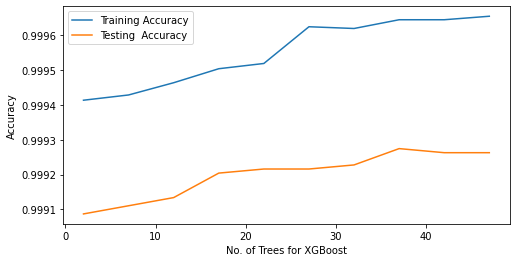

In [85]:
#Finding n Estimators
tree_range = range(2, 50, 5)
score1=[]
score2=[]
for tree in tree_range:
    xgb=XGBClassifier(n_estimators=tree)
    xgb.fit(X_train,y_train)
    score1.append(xgb.score(X_train,y_train))
    score2.append(xgb.score(X_test,y_test))
    
plt.figure(figsize=(8,4))
plt.plot(tree_range,score1,label= 'Training Accuracy')
plt.plot(tree_range,score2,label= 'Testing  Accuracy')
plt.xlabel('No. of Trees for XGBoost')
plt.ylabel('Accuracy')
plt.legend()

In [86]:
# hyperparameter tuning with XGBoost
kfolds = StratifiedKFold(3)

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          
# specify model
xgb_model = XGBClassifier(max_depth=3, n_estimators=32)
xgb_model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = kfolds.split(X_train, y_train),
                        verbose = 1,n_jobs=4,
                        return_train_score=True)
xgb_model_cv.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  18 out of  18 | elapsed:  2.3min finished


GridSearchCV(cv=<generator object _BaseKFold.split at 0x7f572955f7d8>,
             error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=32, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=4,
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
      

In [87]:
# Optimal Score & Parameters
print(' Optimal HyperParameters- ',xgb_model_cv.best_params_)

 Optimal HyperParameters-  {'learning_rate': 0.6, 'subsample': 0.9}


In [88]:
# Model with Optimal Hyperparameters

params = {'learning_rate': 0.6,
          'max_depth': 3, 
          'n_estimators':32,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model
xgb = XGBClassifier(params = params)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic',
              params={'learning_rate': 0.6, 'max_depth': 3, 'n_estimators': 32,
                      'objective': 'binary:logistic', 'subsample': 0.9},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

In [89]:
# Test Set Evaluation
train_threshold = metrics_train(xgb, X_train, y_train)
metrics_test(xgb, train_threshold)

Test AUC: 92.17%
Test Accuracy:  0.9910466626874056
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     85301
           1       0.14      0.85      0.24       142

    accuracy                           0.99     85443
   macro avg       0.57      0.92      0.62     85443
weighted avg       1.00      0.99      0.99     85443

Test Confusion Matrix:
 [[84557   744]
 [   21   121]]


0.9910466626874056

In [90]:
#Adding XGBoosting Value to Model Report DF
temp=pd.DataFrame({'Model':['XGBoosting'],'Balancing_Technique':['Default'] ,'Accuracy': ['99.10%'],'Recall':['85%'],'F1_Score':['0.24'],'Test_AUC':['92.17%']})
Model_Report=pd.concat([Model_Report,temp])

In [91]:
#XG Boost with Data Imbalance Management
import gc
gc.collect()

370

In [92]:
#1) Random Oversampling
kfolds = StratifiedKFold(3)

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          

# specify model
xgb_model = XGBClassifier(max_depth=3, n_estimators=32)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = kfolds.split(X_train_ros, y_train_ros),
                        verbose = 1,n_jobs=4,
                        return_train_score=True)
model_cv.fit(X_train_ros, y_train_ros) 

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  18 out of  18 | elapsed:  4.0min finished


GridSearchCV(cv=<generator object _BaseKFold.split at 0x7f5728c1e830>,
             error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=32, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=4,
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
      

In [93]:
# Optimal Score & Parameters

print('Optimal Parameters- ',model_cv.best_params_)

Optimal Parameters-  {'learning_rate': 0.6, 'subsample': 0.6}


In [94]:
# Building Model With Optimal Hyperparameters
params = {'learning_rate': 0.6,
          'max_depth': 3, 
          'n_estimators':32,
          'subsample':0.6,
         'objective':'binary:logistic'}

# fit model 
xgb_model_ros = XGBClassifier(params = params)
xgb_model_ros.fit(X_train_ros, y_train_ros)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic',
              params={'learning_rate': 0.6, 'max_depth': 3, 'n_estimators': 32,
                      'objective': 'binary:logistic', 'subsample': 0.6},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

In [95]:
# Test Set Evaluation
train_threshold = metrics_train(xgb_model_ros, X_train_ros, y_train_ros)
metrics_test(xgb_model_ros, train_threshold)

Test AUC: 91.29%
Test Accuracy:  0.9946279976124434
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     85301
           1       0.21      0.83      0.34       142

    accuracy                           0.99     85443
   macro avg       0.61      0.91      0.67     85443
weighted avg       1.00      0.99      1.00     85443

Test Confusion Matrix:
 [[84866   435]
 [   24   118]]


0.9946279976124434

In [96]:
#Adding XGBoost Value to Model Report DF
temp=pd.DataFrame({'Model':['XGBoosting'],'Balancing_Technique':['Random Oversampling'] ,'Accuracy': ['99.46%'],'Recall':['83%'],'F1_Score':['0.34'],'Test_AUC':['91.29%']})
Model_Report=pd.concat([Model_Report,temp])

In [97]:
import gc
gc.collect()

370

In [98]:
#2) SMOTE
xgb_smote=XGBClassifier()
xgb_smote.fit(X_train_smote,y_train_smote)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

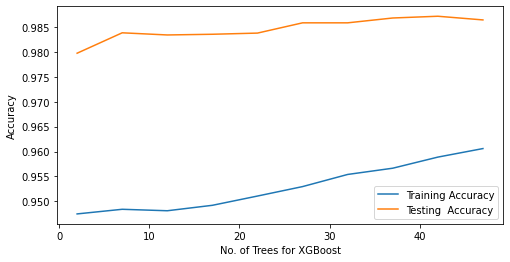

In [99]:
 #Finding Optimum Tree Count using  XGB,Smote
 tree_range = range(2, 50, 5)
score1=[]
score2=[]
for tree in tree_range:
  xgb=XGBClassifier(n_estimators=tree)
  xgb.fit(X_train_smote,y_train_smote)
  score1.append(xgb.score(X_train_smote,y_train_smote))
  score2.append(xgb.score(X_test,y_test))

plt.figure(figsize=(8,4))
plt.plot(tree_range,score1,label= 'Training Accuracy')
plt.plot(tree_range,score2,label= 'Testing  Accuracy')
plt.xlabel('No. of Trees for XGBoost')
plt.ylabel('Accuracy')
plt.legend()

In [100]:
# hyperparameter tuning with XGBoost & SMOTE
kfolds = StratifiedKFold(3)
# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          
# specify model
xgb_model = XGBClassifier(max_depth=3, n_estimators=32)
# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = kfolds.split(X_train_smote, y_train_smote),
                        verbose = 1,n_jobs=4,
                        return_train_score=True)
model_cv.fit(X_train_smote, y_train_smote) 

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  18 out of  18 | elapsed:  5.1min finished


GridSearchCV(cv=<generator object _BaseKFold.split at 0x7f5728ba96d0>,
             error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=32, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=4,
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
      

In [101]:
# Optimal Score & Parameters
print('Optimal HyperParameter- ',model_cv.best_params_)

Optimal HyperParameter-  {'learning_rate': 0.6, 'subsample': 0.6}


In [102]:
#Build Model on Optimal Hyperparameters
params = {'learning_rate': 0.6,
          'max_depth': 3, 
          'n_estimators':32,
          'subsample':0.6,
         'objective':'binary:logistic'}

# fit model
xgb_model_smote = XGBClassifier(params = params)
xgb_model_smote.fit(X_train_smote, y_train_smote)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic',
              params={'learning_rate': 0.6, 'max_depth': 3, 'n_estimators': 32,
                      'objective': 'binary:logistic', 'subsample': 0.6},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

In [103]:
# Test Set Evaluation
train_threshold = metrics_train(xgb_model_smote, X_train_smote, y_train_smote)
metrics_test(xgb_model_smote, train_threshold)

Test AUC: 92.91%
Test Accuracy:  0.9848554006764744
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     85301
           1       0.09      0.87      0.16       142

    accuracy                           0.98     85443
   macro avg       0.54      0.93      0.58     85443
weighted avg       1.00      0.98      0.99     85443

Test Confusion Matrix:
 [[84025  1276]
 [   18   124]]


0.9848554006764744

In [104]:
#Adding Logistic Regression Value to Model Report DF
temp=pd.DataFrame({'Model':['XGBoosting'],'Balancing_Technique':['SMOTE'] ,'Accuracy': ['98.48%'],'Recall':['87%'],'F1_Score':['0.16'],'Test_AUC':['92.91%']})
Model_Report=pd.concat([Model_Report,temp])

In [105]:
#3) Adasyn
import gc
gc.collect()

516

In [106]:
# XGBoost with Adasyn
kfolds = StratifiedKFold(3)
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          
xgb_model = XGBClassifier(max_depth=3, n_estimators=27)
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = kfolds.split(X_train_adasyn, y_train_adasyn),
                        verbose = 1,n_jobs=4,
                        return_train_score=True)
model_cv.fit(X_train_adasyn, y_train_adasyn)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  18 out of  18 | elapsed:  4.2min finished


GridSearchCV(cv=<generator object _BaseKFold.split at 0x7f572630c990>,
             error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=27, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=4,
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
      

In [107]:
# Optimal Score & Parameters
print('Optimal HyperParameters- ',model_cv.best_params_)

Optimal HyperParameters-  {'learning_rate': 0.6, 'subsample': 0.9}


In [108]:
#Build Model with XGBoost Adasyn
from imblearn.over_sampling import ADASYN 
ada = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
params = {'learning_rate': 0.6,
          'max_depth': 3, 
          'n_estimators':32,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model
xgb_model_adasyn = XGBClassifier(params = params)
xgb_model_adasyn.fit(X_train_adasyn, y_train_adasyn)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic',
              params={'learning_rate': 0.6, 'max_depth': 3, 'n_estimators': 32,
                      'objective': 'binary:logistic', 'subsample': 0.9},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

In [109]:
#Adding Logistic Regression Value to Model Report DF
temp=pd.DataFrame({'Model':['XGBoosting'],'Balancing_Technique':['Adasyn'] ,'Accuracy': ['97.99'],'Recall':['85%'],'F1_Score':['0.07'],'Test_AUC':['92.80%']})
Model_Report=pd.concat([Model_Report,temp])

In [110]:
import gc
gc.collect()

414

#3)Decision Trees

In [111]:
#Default Decision Tree
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [112]:
# Test Set Evaluation
train_threshold = metrics_train(dt, X_train, y_train)
metrics_test(dt, train_threshold)

Test AUC: 88.34%
Test Accuracy:  0.998735999438222
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85301
           1       0.59      0.77      0.67       142

    accuracy                           1.00     85443
   macro avg       0.80      0.88      0.83     85443
weighted avg       1.00      1.00      1.00     85443

Test Confusion Matrix:
 [[85226    75]
 [   33   109]]


0.998735999438222

In [114]:
dt_automated_gridsearch(X_train, y_train)

Fitting 3 folds for each of 120 candidates, totalling 360 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:  1.4min
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed: 12.0min
[Parallel(n_jobs=3)]: Done 360 out of 360 | elapsed: 20.7min finished


Best Accuracy 0.9993629745851873
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=30, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [115]:
# model with optimal hyperparameters- as per grid search cv. 
clf_entropy= DecisionTreeClassifier(criterion = "entropy", 
                                  random_state = 100,
                                  max_depth=8, 
                                  min_samples_leaf=30,
                                  min_samples_split=100)
clf_entropy.fit(X_train, y_train)

from sklearn.metrics import classification_report,confusion_matrix
y_pred = clf_entropy.predict(X_test)
report=classification_report(y_test, y_pred, output_dict=True)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85301
           1       0.75      0.80      0.77       142

    accuracy                           1.00     85443
   macro avg       0.87      0.90      0.89     85443
weighted avg       1.00      1.00      1.00     85443



In [116]:
# Test Set Evaluation
train_threshold = metrics_train(clf_entropy, X_train, y_train)
metrics_test(clf_entropy, train_threshold)

Test AUC: 92.68%
Test Accuracy:  0.9801271022787121
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85301
           1       0.07      0.87      0.13       142

    accuracy                           0.98     85443
   macro avg       0.53      0.93      0.56     85443
weighted avg       1.00      0.98      0.99     85443

Test Confusion Matrix:
 [[83621  1680]
 [   18   124]]


0.9801271022787121

In [117]:
#Adding Decision Tree Value to Model Report DF
temp=pd.DataFrame({'Model':['Decision Trees'],'Balancing_Technique':['Default'] ,'Accuracy': ['98.01'],'Recall':['87%'],'F1_Score':['0.13'],'Test_AUC':['92.68%']})
Model_Report=pd.concat([Model_Report,temp])

In [ ]:
# Decision Trees with Data Imbalance Management
#1) Random Oversampling

In [118]:
dt_automated_gridsearch(X_train_ros, y_train_ros)

Fitting 3 folds for each of 120 candidates, totalling 360 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:  1.9min
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed: 13.5min
[Parallel(n_jobs=3)]: Done 360 out of 360 | elapsed: 24.4min finished


Best Accuracy 0.9945430974705297
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=30, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [119]:
# model with optimal hyperparameters- as per grid search cv. 
clf_entropy= DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=30,
                                  min_samples_split=50)
clf_entropy.fit(X_train_ros, y_train_ros)

from sklearn.metrics import classification_report,confusion_matrix
y_pred = clf_entropy.predict(X_test)
report=classification_report(y_test, y_pred, output_dict=True)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     85301
           1       0.14      0.77      0.24       142

    accuracy                           0.99     85443
   macro avg       0.57      0.88      0.62     85443
weighted avg       1.00      0.99      0.99     85443



In [120]:
# Test Set Evaluation
train_threshold = metrics_train(clf_entropy, X_train_ros, y_train_ros)
metrics_test(clf_entropy, train_threshold)

Test AUC: 88.41%
Test Accuracy:  0.993118219163653
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     85301
           1       0.17      0.77      0.27       142

    accuracy                           0.99     85443
   macro avg       0.58      0.88      0.63     85443
weighted avg       1.00      0.99      1.00     85443

Test Confusion Matrix:
 [[84745   556]
 [   32   110]]


0.993118219163653

In [121]:
#Adding Decision Tree Value to Model Report DF
temp=pd.DataFrame({'Model':['Decision Trees'],'Balancing_Technique':['Random OverSampling'] ,'Accuracy': ['99.31'],'Recall':['77%'],'F1_Score':['0.22'],'Test_AUC':['88.41%']})
Model_Report=pd.concat([Model_Report,temp])

In [122]:
import gc
gc.collect()

1770

In [123]:
#2) SMOTE
dt_automated_gridsearch(X_train_smote, y_train_smote)

Fitting 3 folds for each of 120 candidates, totalling 360 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:  3.2min
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed: 25.6min
[Parallel(n_jobs=3)]: Done 360 out of 360 | elapsed: 43.2min finished


Best Accuracy 0.9866190318269066
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=30, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [124]:
# model with optimal hyperparameters- as per grid search cv. 
clf_entropy= DecisionTreeClassifier(criterion = "entropy", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=30,
                                  min_samples_split=50)
clf_entropy.fit(X_train_smote, y_train_smote)

from sklearn.metrics import classification_report,confusion_matrix
y_pred = clf_entropy.predict(X_test)
report=classification_report(y_test, y_pred, output_dict=True)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85301
           1       0.08      0.82      0.14       142

    accuracy                           0.98     85443
   macro avg       0.54      0.90      0.57     85443
weighted avg       1.00      0.98      0.99     85443



In [125]:
# Test Set Evaluation
train_threshold = metrics_train(clf_entropy, X_train_smote, y_train_smote)
metrics_test(clf_entropy, train_threshold)

Test AUC: 90.02%
Test Accuracy:  0.9831583628851983
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85301
           1       0.08      0.82      0.14       142

    accuracy                           0.98     85443
   macro avg       0.54      0.90      0.57     85443
weighted avg       1.00      0.98      0.99     85443

Test Confusion Matrix:
 [[83888  1413]
 [   26   116]]


0.9831583628851983

In [126]:
#Adding Decision Tree Value to Model Report DF
temp=pd.DataFrame({'Model':['Decision Trees'],'Balancing_Technique':['SMOTE'] ,'Accuracy': ['98.31'],'Recall':['82%'],'F1_Score':['0.14'],'Test_AUC':['90.02%']})
Model_Report=pd.concat([Model_Report,temp])

In [127]:
import gc
gc.collect()

909

In [128]:
#3) Adasyn
dt_automated_gridsearch(X_train_adasyn, y_train_adasyn)

Fitting 3 folds for each of 120 candidates, totalling 360 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:  3.0min
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed: 25.2min
[Parallel(n_jobs=3)]: Done 360 out of 360 | elapsed: 41.9min finished


Best Accuracy 0.9078137130022536
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=60, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [129]:
# model with optimal hyperparameters- as per grid search cv. 
clf_entropy= DecisionTreeClassifier(criterion = "entropy", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=60,
                                  min_samples_split=100)
clf_entropy.fit(X_train_adasyn, y_train_adasyn)

from sklearn.metrics import classification_report,confusion_matrix
y_pred = clf_entropy.predict(X_test)
report=classification_report(y_test, y_pred, output_dict=True)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     85301
           1       0.04      0.83      0.07       142

    accuracy                           0.96     85443
   macro avg       0.52      0.90      0.53     85443
weighted avg       1.00      0.96      0.98     85443



In [130]:
# Test Set Evaluation
train_threshold = metrics_train(clf_entropy, X_train_adasyn, y_train_adasyn)
metrics_test(clf_entropy, train_threshold)

Test AUC: 89.77%
Test Accuracy:  0.9641398359140011
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     85301
           1       0.04      0.83      0.07       142

    accuracy                           0.96     85443
   macro avg       0.52      0.90      0.53     85443
weighted avg       1.00      0.96      0.98     85443

Test Confusion Matrix:
 [[82261  3040]
 [   24   118]]


0.9641398359140011

In [131]:
#Adding Decision Tree Value to Model Report DF
temp=pd.DataFrame({'Model':['Decision Trees'],'Balancing_Technique':['Adasyn'] ,'Accuracy': ['96.41'],'Recall':['83%'],'F1_Score':['0.07'],'Test_AUC':['89.77%']})
Model_Report=pd.concat([Model_Report,temp])

In [132]:
import gc
gc.collect()

927

In [ ]:
Model_Report 

,Model,Balancing_Technique,Accuracy,Recall,F1_Score,Test_AUC
0,,,,,,
0,Logistic Regression,Default,96.54%,87%,0.08,91.94%
0,Logistic Regression,Random Oversampling,94.57%,89%,0.06,92.21%
0,Logistic Regression,SMOTE,93.56%,92%,0.05,92.56%
0,Logistic Regression,ADASYN,80.26%,96%,0.02,88.01%
0,XGBoosting,Default,98.64%,85%,0.17,91.59%
0,XGBoosting,Default,98.44%,85%,0.17,91.59%
0,XGBoosting,Random Oversampling,99.23%,83%,0.27,91.18%
0,XGBoosting,SMOTE,98.39%,85%,0.15,91.46%
0,XGBoosting,Adasyn,97.99,85%,0.07,92.80%


#4) Random Forests

In [80]:
#Default
import gc
gc.collect()

164977

In [33]:
# Running the random forest with default parameters.
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [34]:
# Test Set Evaluation
train_threshold = metrics_train(rfc, X_train, y_train)
metrics_test(rfc, train_threshold)

Test AUC: 87.31%
Test Accuracy:  0.9993914071369217
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85301
           1       0.87      0.75      0.80       142

    accuracy                           1.00     85443
   macro avg       0.93      0.87      0.90     85443
weighted avg       1.00      1.00      1.00     85443

Test Confusion Matrix:
 [[85285    16]
 [   36   106]]


0.9993914071369217

In [35]:
#Adding Decision Tree Value to Model Report DF
temp=pd.DataFrame({'Model':['Random Forest'],'Balancing_Technique':['Default'] ,'Accuracy': ['99.92'],'Recall':['79%'],'F1_Score':['0.76'],'Test_AUC':['86.96%']})
Model_Report=pd.concat([Model_Report,temp])

In [36]:
#Automated Grid Search for Finding Hyperparameters
rfc_automatedgridsearch(X_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  24 out of  24 | elapsed: 22.8min finished


Optimal Hyperparameters-  {'max_depth': 4, 'max_features': 8, 'min_samples_leaf': 150, 'min_samples_split': 250, 'n_estimators': 100}


In [39]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=4,
                             min_samples_leaf=150, 
                             min_samples_split=250,
                             max_features=8,
                             n_estimators=100)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features=8,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=150, min_samples_split=250,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [40]:
# Test Set Evaluation
train_threshold = metrics_train(rfc, X_train, y_train)
metrics_test(rfc, train_threshold)

Test AUC: 91.02%
Test Accuracy:  0.9751998408295589
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85301
           1       0.05      0.85      0.10       142

    accuracy                           0.98     85443
   macro avg       0.53      0.91      0.54     85443
weighted avg       1.00      0.98      0.99     85443

Test Confusion Matrix:
 [[83204  2097]
 [   22   120]]


0.9751998408295589

In [ ]:
#Adding Decision Tree Value to Model Report DF
temp=pd.DataFrame({'Model':['Random Forest'],'Balancing_Technique':['Default,with Hyperparameters'] ,'Accuracy': ['97.51%'],'Recall':['85%'],'F1_Score':['0.10'],'Test_AUC':['91.02%']})
Model_Report=pd.concat([Model_Report,temp])

In [ ]:
#With Data Imbalance Management

In [41]:
#1) Random Oversaml=pling
rfc_automatedgridsearch(X_train_ros,y_train_ros)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  24 out of  24 | elapsed: 33.0min finished


Optimal Hyperparameters-  {'max_depth': 7, 'max_features': 8, 'min_samples_leaf': 150, 'min_samples_split': 250, 'n_estimators': 100}


In [42]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=7,
                             min_samples_leaf=150, 
                             min_samples_split=250,
                             max_features=8,
                             n_estimators=100)
rfc.fit(X_train_ros,y_train_ros)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features=8,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=150, min_samples_split=250,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [43]:
# Test Set Evaluation
train_threshold = metrics_train(rfc, X_train_ros, y_train_ros)
metrics_test(rfc, train_threshold)

Test AUC: 93.05%
Test Accuracy:  0.9804665098369674
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85301
           1       0.07      0.88      0.13       142

    accuracy                           0.98     85443
   macro avg       0.54      0.93      0.56     85443
weighted avg       1.00      0.98      0.99     85443

Test Confusion Matrix:
 [[83649  1652]
 [   17   125]]


0.9804665098369674

In [44]:
#Adding Decision Tree Value to Model Report DF
temp=pd.DataFrame({'Model':['Random Forest'],'Balancing_Technique':['Random Sampling,with Hyperparameters'] ,'Accuracy': ['98.04%'],'Recall':['88%'],'F1_Score':['0.13'],'Test_AUC':['93.05%']})
Model_Report=pd.concat([Model_Report,temp])

In [45]:
#2) SMOTE
rfc_automatedgridsearch(X_train_smote,y_train_smote)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  24 out of  24 | elapsed: 48.7min finished


Optimal Hyperparameters-  {'max_depth': 7, 'max_features': 8, 'min_samples_leaf': 150, 'min_samples_split': 250, 'n_estimators': 100}


In [46]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=7,
                             min_samples_leaf=150, 
                             min_samples_split=250,
                             max_features=8,
                             n_estimators=100)
rfc.fit(X_train_smote,y_train_smote)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features=8,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=150, min_samples_split=250,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [47]:
# Test Set Evaluation
train_threshold = metrics_train(rfc, X_train_smote, y_train_smote)
metrics_test(rfc, train_threshold)

Test AUC: 92.48%
Test Accuracy:  0.9831115480495769
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85301
           1       0.08      0.87      0.15       142

    accuracy                           0.98     85443
   macro avg       0.54      0.92      0.57     85443
weighted avg       1.00      0.98      0.99     85443

Test Confusion Matrix:
 [[83877  1424]
 [   19   123]]


0.9831115480495769

In [48]:
#Adding Decision Tree Value to Model Report DF
temp=pd.DataFrame({'Model':['Random Forest'],'Balancing_Technique':['SMOTE,with Hyperparameters'] ,'Accuracy': ['98.31%'],'Recall':['87%'],'F1_Score':['0.15'],'Test_AUC':['92.48%']})
Model_Report=pd.concat([Model_Report,temp])

In [74]:
#3) Adasyn
rfc_automatedgridsearch(X_train_adasyn,y_train_adasyn)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  24 out of  24 | elapsed: 47.6min finished


Optimal Hyperparameters-  {'max_depth': 7, 'max_features': 8, 'min_samples_leaf': 150, 'min_samples_split': 250, 'n_estimators': 100}


In [75]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=7,
                             min_samples_leaf=150, 
                             min_samples_split=250,
                             max_features=8,
                             n_estimators=100)
rfc.fit(X_train_adasyn,y_train_adasyn)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features=8,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=150, min_samples_split=250,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [76]:
# Test Set Evaluation
train_threshold = metrics_train(rfc, X_train_adasyn, y_train_adasyn)
metrics_test(rfc, train_threshold)

Test AUC: 92.06%
Test Accuracy:  0.9677679856746603
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     85301
           1       0.04      0.87      0.08       142

    accuracy                           0.97     85443
   macro avg       0.52      0.92      0.53     85443
weighted avg       1.00      0.97      0.98     85443

Test Confusion Matrix:
 [[82565  2736]
 [   18   124]]


0.9677679856746603

In [77]:
#Adding Decision Tree Value to Model Report DF
temp=pd.DataFrame({'Model':['Random Forest'],'Balancing_Technique':['Adasyn,with Hyperparameters'] ,'Accuracy': ['96.77%'],'Recall':['87%'],'F1_Score':['0.08'],'Test_AUC':['92.06%']})
Model_Report=pd.concat([Model_Report,temp])

In [133]:
#View at final Model Comparison
Model_Report

,Model,Balancing_Technique,Accuracy,Recall,F1_Score,Test_AUC
0,,,,,,
0,Random Forest,Default,99.92,79%,0.76,86.96%
0,Random Forest,"Random Sampling,with Hyperparameters",98.04%,88%,0.10,93.05%
0,Random Forest,"SMOTE,with Hyperparameters",98.31%,87%,0.15,92.48%
0,Logistic Regression,Default,96.54%,87%,0.08,91.94%
0,Logistic Regression,Random Oversampling,98.40%,87%,0.15,92.87%
0,Logistic Regression,SMOTE,97.55%,89%,0.11,93.50%
0,Logistic Regression,ADASYN,85.10%,95%,0.02,90.08%
0,Random Forest,"Adasyn,with Hyperparameters",96.77%,87%,0.08,92.06%
0,XGBoosting,Default,99.10%,85%,0.24,92.17%


From Above model Report it can be seen that XGboosting with SMOTE & Random Forest with SMOTE Provide with Best Classification for Fraudlent Cases. But depending on business requirements, we can go with other Models as well.

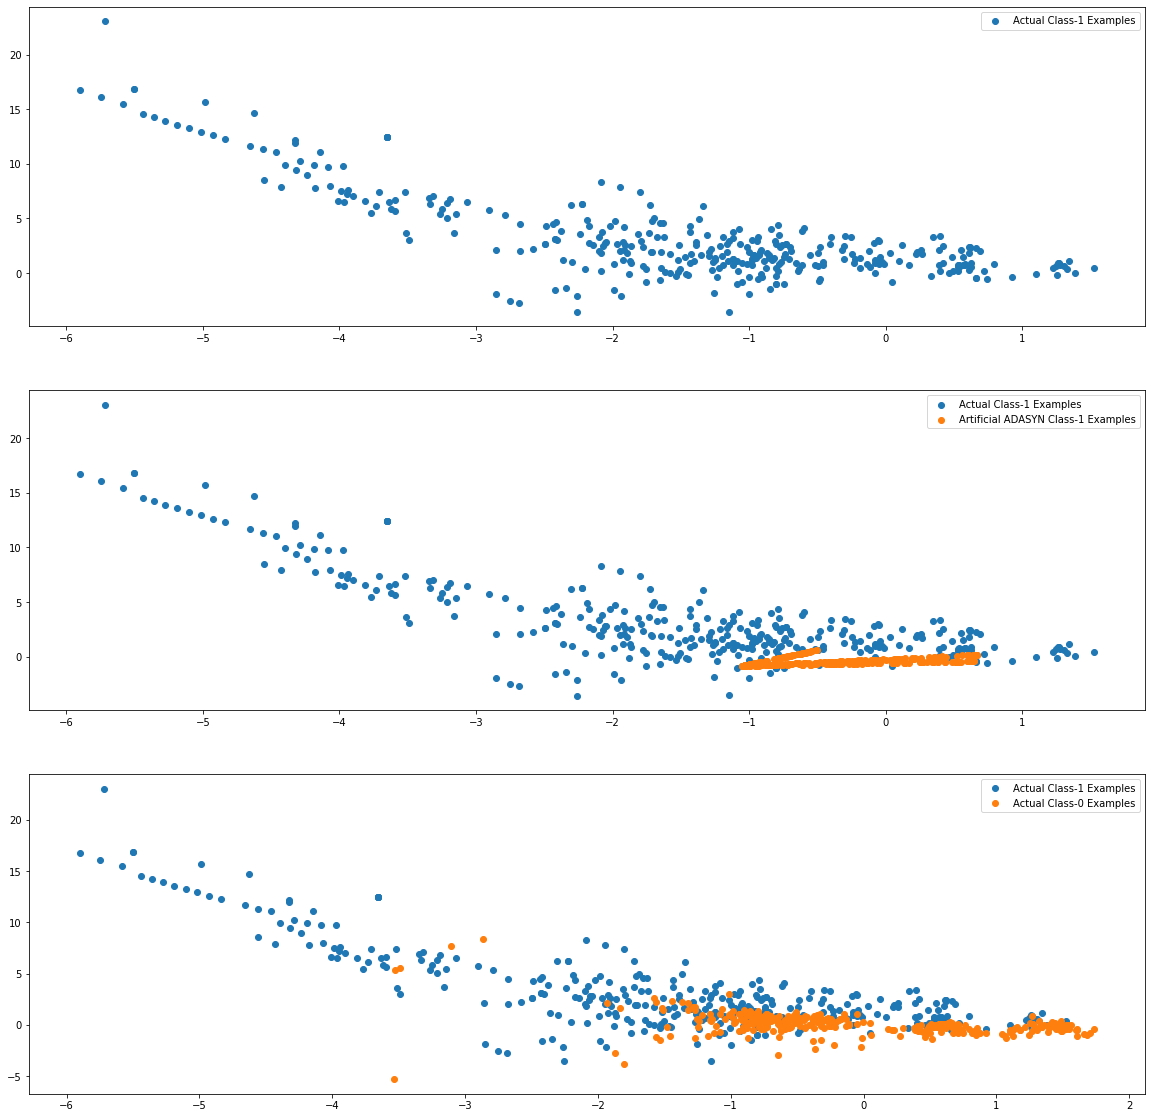

In [ ]:
#Adasyn Class Distribution
adasyn_classdistribution(X_train,y_train)

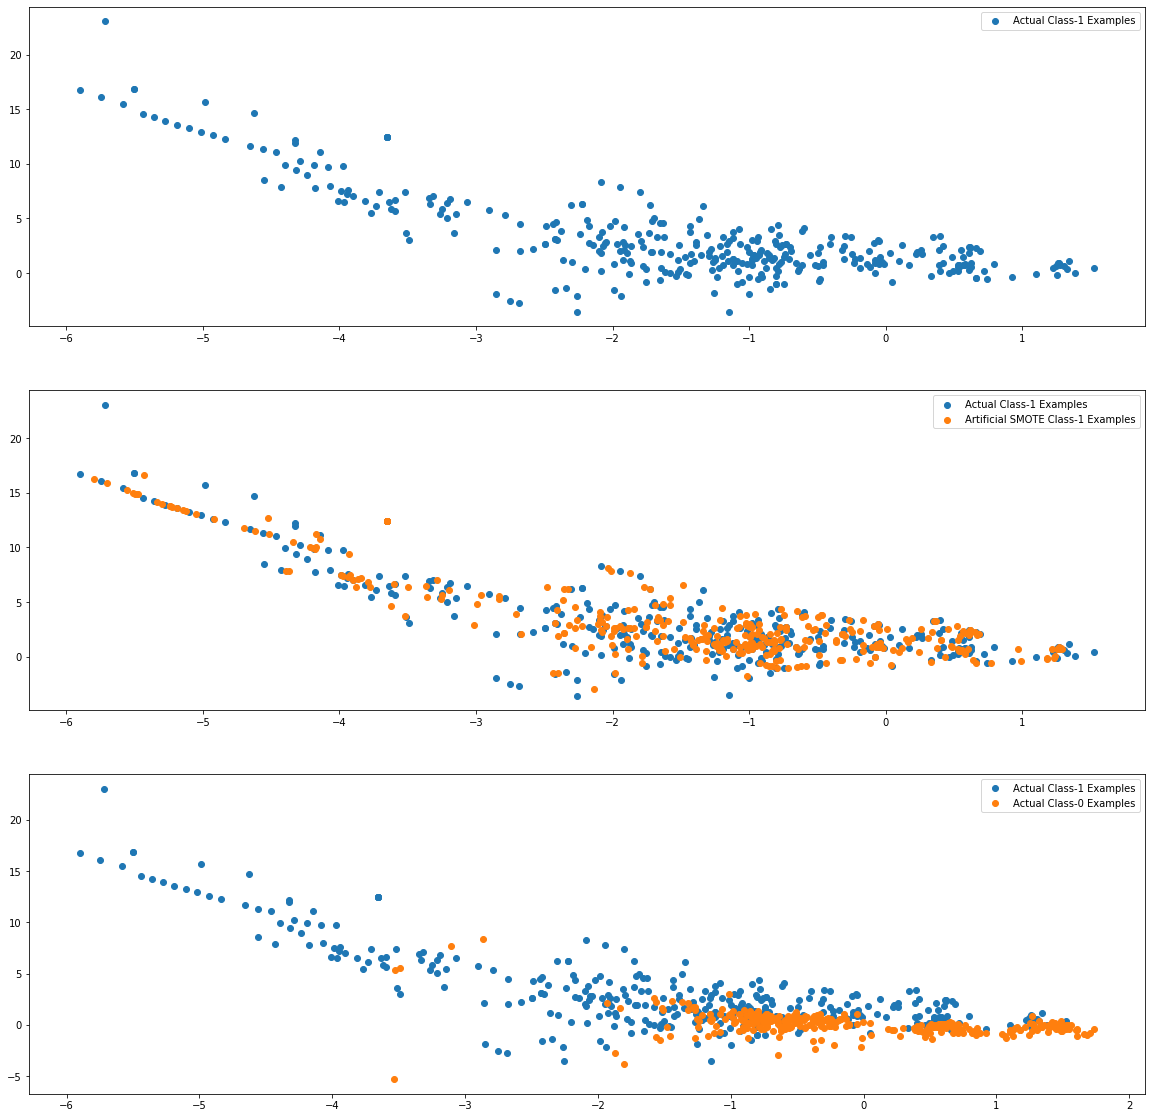

In [ ]:
#Smote Class Distribution
smote_classdistribution(X_train,y_train)

**Important Features using XGboost with SMOTE**

Top var = 14
2nd Top var = 12
3rd Top var = 4


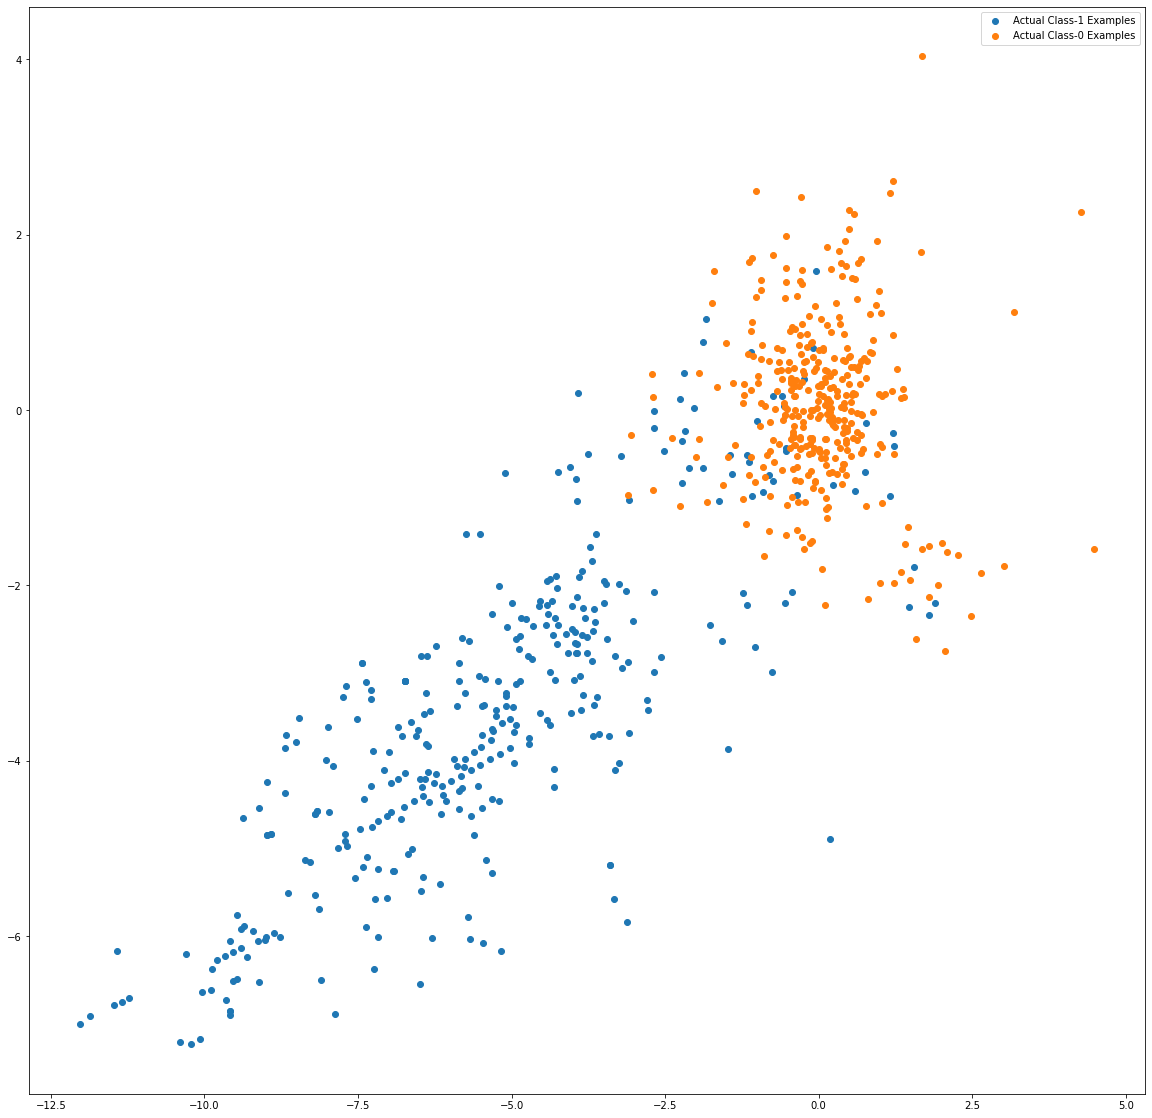

In [134]:
#Important Features
var_imp = []
for i in xgb_smote.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xgb_smote.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xgb_smote.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xgb_smote.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(xgb_smote.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgb_smote.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

**Important Features using Random Forest Classifier with SMOTE**

In [135]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc_smote = RandomForestClassifier(bootstrap=True,
                             max_depth=7,
                             min_samples_leaf=150, 
                             min_samples_split=250,
                             max_features=8,
                             n_estimators=100)
rfc_smote.fit(X_train_smote,y_train_smote)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features=8,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=150, min_samples_split=250,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Top var = 14
2nd Top var = 10
3rd Top var = 12


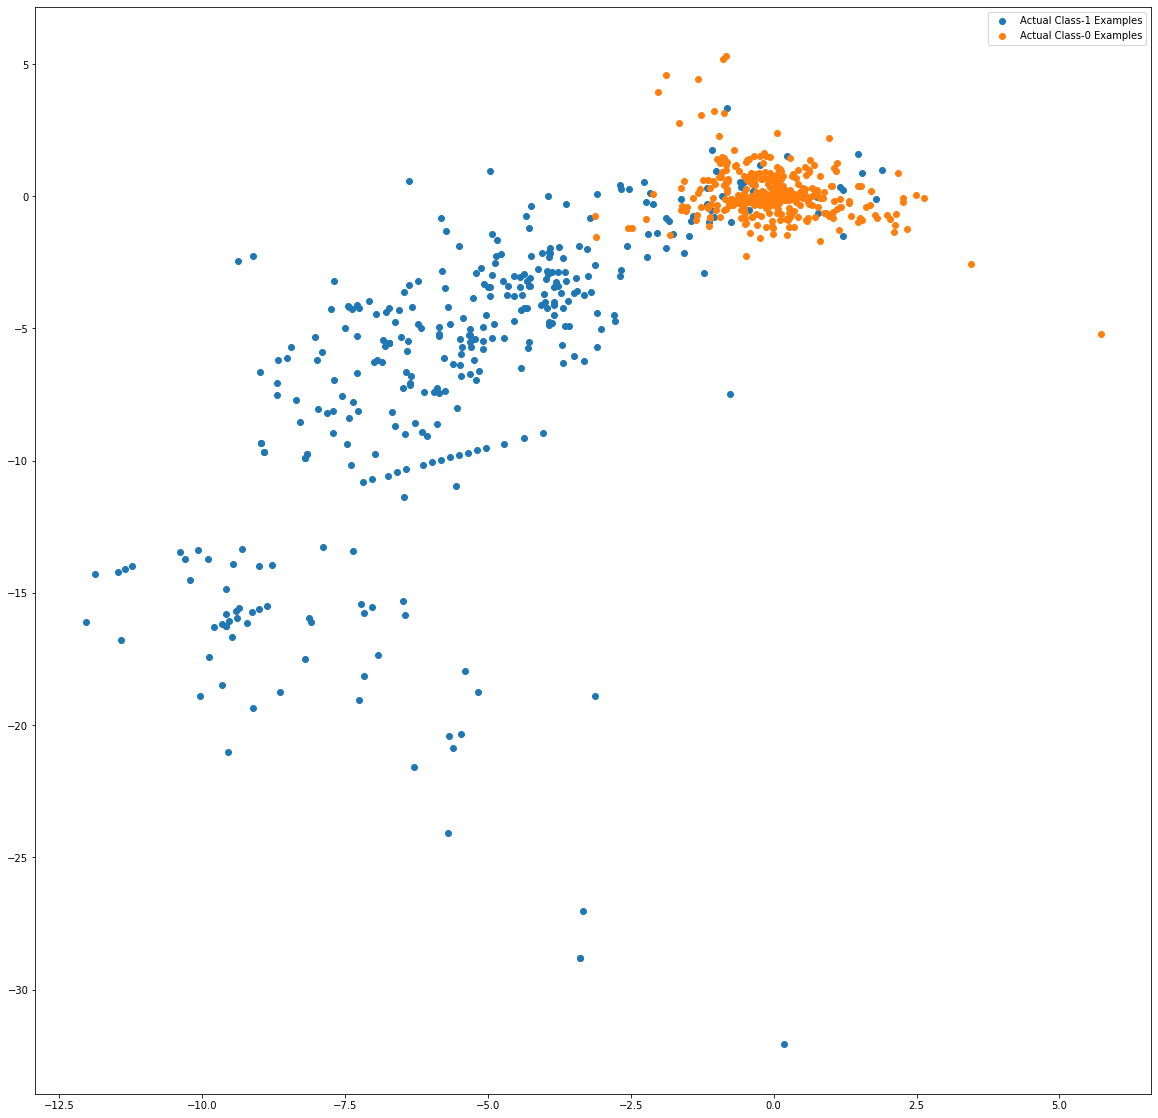

In [136]:
#Important Features
var_imp = []
for i in rfc_smote.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(rfc_smote.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(rfc_smote.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(rfc_smote.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(rfc_smote.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(rfc_smote.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [79]:
elapsed = timeit.default_timer() - start_time
print('Elapsed Time in Minutes-', round((elapsed/60),0))

Elapsed Time in Minutes- 208.0
